# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dhafindra Razaqa Stefano
- **Email:** Dhafindra.razaqa@gmail.com
- **ID Dicoding:** dhafindrars

## Menentukan Pertanyaan Bisnis
- Apakah jumlah sepeda yang disewa lebih banyak di hari libur atau di hari kerja?
- Bulan apa saja sepeda paling banyak di sewa?

## Import Semua Packages/Library yang Digunakan


In [175]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [176]:
df1 = pd.read_csv('day.csv')
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [177]:
df2 = pd.read_csv('hour.csv')
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### karena dataset2 atau hour.csv lebih lengkap, maka dataset itu yang akan dipakai untuk analisis data

### Assessing Data

In [178]:
# Mencari tahu informasi tentang dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [179]:
# Mencari Missing Value
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [180]:
# Mencari Duplicate Value
duplicates = {}

for column in df2.columns:
    duplicates[column] = df2.duplicated(subset=[column]).sum()

# Menampilkan jumlah data duplikat dari setiap kolom
for column, n_duplicates in duplicates.items(): 
    print(f'{column} : {n_duplicates} data duplikat')

instant : 0 data duplikat
dteday : 16648 data duplikat
season : 17375 data duplikat
yr : 17377 data duplikat
mnth : 17367 data duplikat
hr : 17355 data duplikat
holiday : 17377 data duplikat
weekday : 17372 data duplikat
workingday : 17377 data duplikat
weathersit : 17375 data duplikat
temp : 17329 data duplikat
atemp : 17314 data duplikat
hum : 17290 data duplikat
windspeed : 17349 data duplikat
casual : 17057 data duplikat
registered : 16603 data duplikat
cnt : 16510 data duplikat


In [181]:
# Mencari outlier
outliers = {}
for column in df2.columns:
    if df2[column].dtype.kind in 'biufc':  # Check if the column is numeric
        Q1 = df2[column].quantile(0.25)  # First quartile (Q1)
        Q3 = df2[column].quantile(0.75)  # Third quartile (Q3)
        IQR = Q3 - Q1  # Interquartile range (IQR)
        # Define the range for non-outlier values
        non_outlier_range = (df2[column] >= Q1 - 1.5*IQR) & (df2[column] <= Q3 + 1.5*IQR)
        # Count the number of outliers and add to the dictionary
        outliers[column] = len(df2[column]) - non_outlier_range.sum()

# Print the number of outliers in each column
for column, n_outliers in outliers.items():
    print(f'{column}: {n_outliers} data pencilan')


instant: 0 data pencilan
season: 0 data pencilan
yr: 0 data pencilan
mnth: 0 data pencilan
hr: 0 data pencilan
holiday: 500 data pencilan
weekday: 0 data pencilan
workingday: 0 data pencilan
weathersit: 3 data pencilan
temp: 0 data pencilan
atemp: 0 data pencilan
hum: 22 data pencilan
windspeed: 342 data pencilan
casual: 1192 data pencilan
registered: 680 data pencilan
cnt: 505 data pencilan


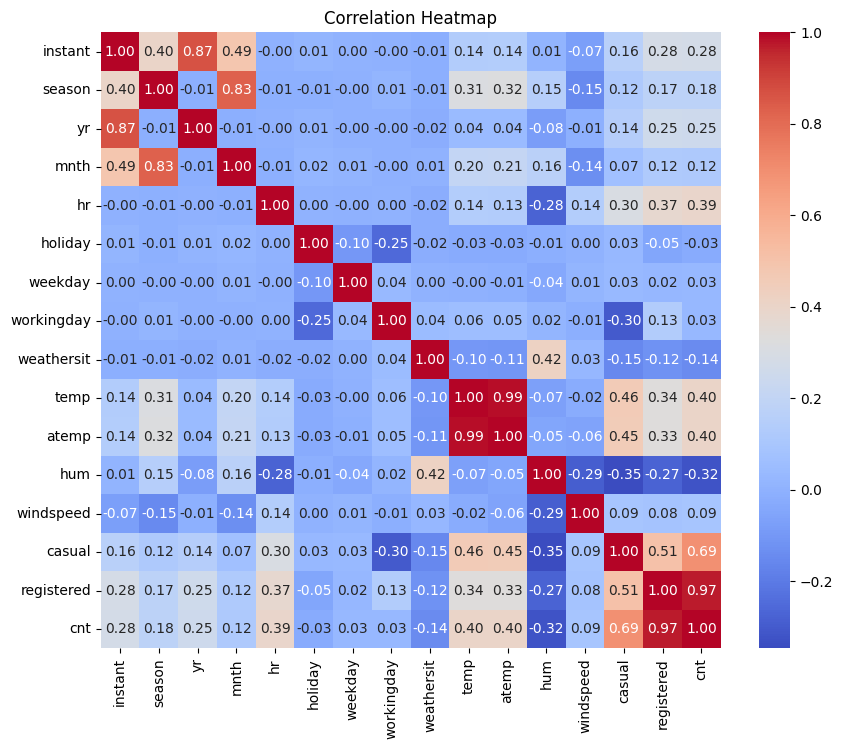

In [182]:
# Korelasi antar fitur sebelum data dibersihkan

# Select only the numeric columns from the DataFrame
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for the numeric columns
corr = df2[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Cleaning Data

In [183]:
# Menghilangkan beberapa fitur yang tidak terpakai
dropkolom = ['instant', 'atemp','hr','holiday','weekday']
df2 = df2.drop(dropkolom, axis=1)

In [184]:
# Konversi dteday menjadi datetime
# Ini dilakukan karena kita hanya akan melihat banyak sewaan berdasarkan bulan
df2['dteday'] = pd.to_datetime(df2['dteday'])

#Ambil bulan dari 'dteday'
df2['month'] = df2['dteday'].dt.month

In [191]:
# hilangkan outlier yang sebelumnya sudah ditemukan
for column in df2.columns:
    if df2[column].dtype.kind in 'biufc':  # Cek apakah kolom yang diperiksa numerik
        Q1 = df2[column].quantile(0.25)  # Q1
        Q3 = df2[column].quantile(0.75)  # Q3
        IQR = Q3 - Q1  # Interquartile range (IQR)
        # Mendefinisikan range untuk nilai-nilai non-pencilan
        non_outlier_range = (df2[column] >= Q1 - 1.5*IQR) & (df2[column] <= Q3 + 1.5*IQR)
        # RHilangkan pencilan
        df2 = df2[non_outlier_range]

## Exploratory Data Analysis (EDA)

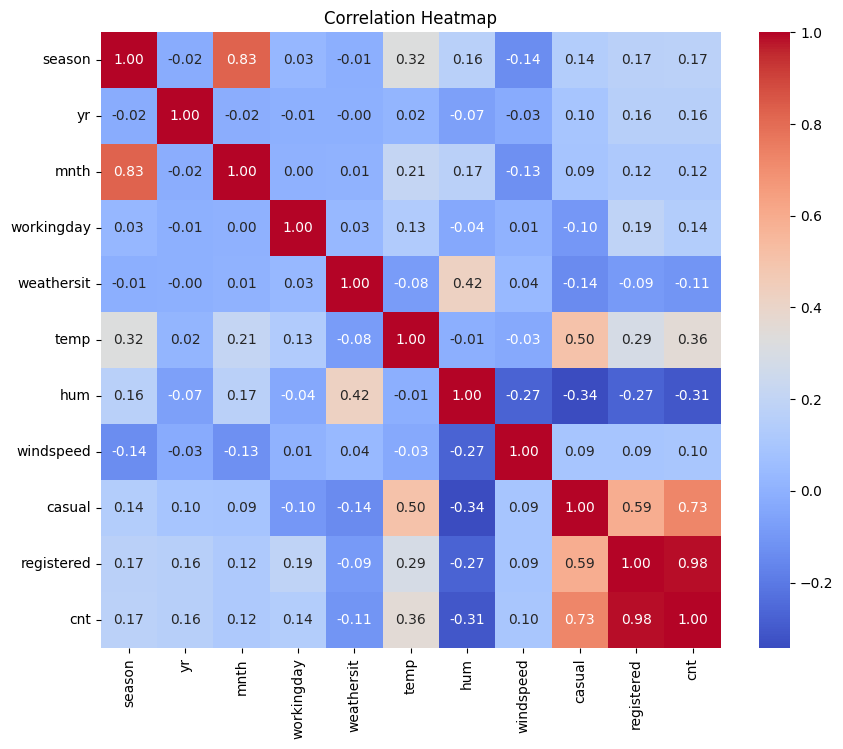

In [186]:
# Korelasi antar fitur setelah data dibersihkan
# Memilih kolom yang numerik saja
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Hitung korelasi kolom-kolom tersebut
corr = df2[numeric_columns].corr()

# Buat Heatmap korelasi tersebut
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [192]:
# Melihat korelasi antar fitur-fitur yang digunakan untuk menjawab pertanyaan bisnis
korelasi = df2['workingday'].corr(df2['cnt'])
print("Korelasi antara fitur 'workingday' dan 'cnt' adalah {}".format(korelasi))

korelasi = df2['dteday'].corr(df2['cnt'])
print("Korelasi antara fitur 'dteday' dan 'cnt' adalah {}".format(korelasi))

Korelasi antara fitur 'workingday' dan 'cnt' adalah 0.1698404603845409
Korelasi antara fitur 'dteday' dan 'cnt' adalah 0.18312984933967175


In [188]:
# Melihat jumlah total sewaan di setiap bulan
monthly_cnt = df2.groupby('month')['cnt'].sum()
print(monthly_cnt)

month
1     119969
2     126150
3     151156
4     160798
5     195506
6     196646
7     208643
8     213344
9     185152
10    189383
11    186237
12    178222
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

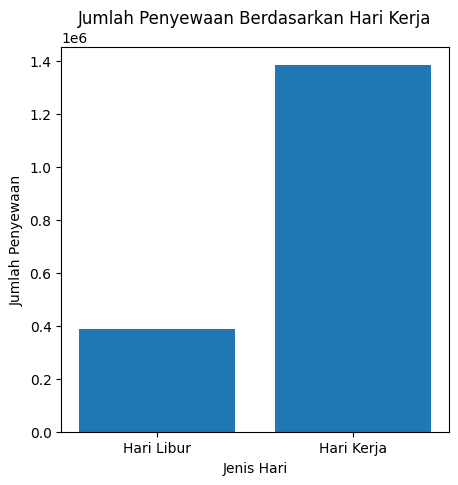

In [193]:
# Kelompokkan data berdasarkan 'workingday' dan hitung jumlah 'cnt' dari setiap kelompok
cnt_by_workingday = df2.groupby('workingday')['cnt'].sum()

# Buat bar chart
plt.figure(figsize=(5, 5))
plt.bar(cnt_by_workingday.index, cnt_by_workingday.values)
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Berdasarkan Hari Kerja')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()


### Pertanyaan 2:

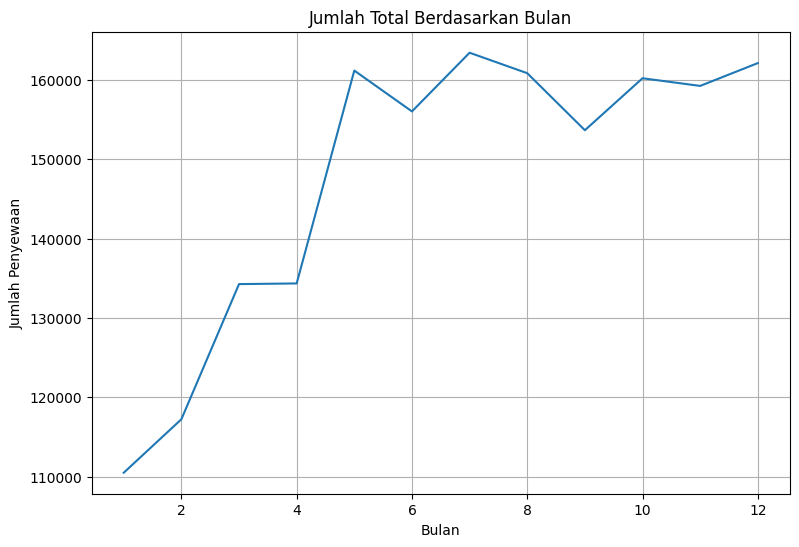

In [195]:
#Konversi dteday menjadi datetime
df2['dteday'] = pd.to_datetime(df2['dteday'])

#Ambil bulan dari 'dteday'
df2['month'] = df2['dteday'].dt.month

monthly_cnt = df2.groupby('month')['cnt'].sum()

plt.figure(figsize=(9, 6))
plt.plot(monthly_cnt.index, monthly_cnt.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Total Berdasarkan Bulan')
plt.grid(True)
plt.show()

## Conclusion


- Conclusion pertanyaan 1

        dari bar chart diatas, dapat disimpulkan bahwa sepeda jauh lebih banyak disewa pada hari kerja dibandingkan hari libur.

- Conclusion pertanyaan 2: 
        
        dari line graph diatas, dapat disimpulkan bahwa penyewaan sepeda paling banyak terjadi di bulan ke-7 Juli
